### Notebook for Temperature/Humidity Plots


In [10]:
## Run get_meteo_data.sh to create environmental dataset of FUR station


##________________________________________________________
''' import libraries '''

import os, sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
#import obspy as obs

from obspy import UTCDateTime
from andbro__save_to import __save_to
from andbro__get_data import __get_data
from andbro__get_seconds import __get_seconds
from andbro__fft import __fft
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import ticker as tick
from andbro__find_max import __find_max

##________________________________________________________
''' general settings '''

plt.style.use('default') # print(plt.style.available)
# import seaborn as sns
# sns.set.style("whitegrid") # whitegrid, ticks, white

##________________________________________________________
''' set variables '''

ipath = '/home/brotzer/Documents/Data/romy_environmentals/'

opath = '/home/brotzer/notebooks/figs/'


##________________________________________________________

# ifile = 'romy_temperature_humidity_vdl120_20200903.txt'
# cols = ['UNIXtime', 'temp', 'hum', 'empty', 'date', 'time', 'dew', 'water']


##________________________________________________________
# name, startdate = 'ROMY Base', '20200904'

# ifile = 'romy_temperature_humidity_vdl120_20200904.dat'
# cols = ['UNIXtime', 'temp', 'hum']

# furpath='/home/brotzer/Documents/Data/FUR_Wetter/'
# furfile='FURT.WSX.040920.150920'
# cols2  =['idx', 'sec', 'date', 'time', 'temp','hum','P']


##________________________________________________________
name, startdate = 'ROMY West' , '20200921'

ifile = 'romy_temperature_humidity_vdl120_20200921.dat'
cols = ['UNIXtime', 'temp', 'hum']

furpath='/home/brotzer/Documents/Data/FUR_Wetter/'
furfile='FURT.WSX.210920.280920'
cols2  =['idx', 'sec', 'date', 'time', 'temp','hum','P']


' import libraries '

' general settings '

' set variables '

In [11]:
#cat /home/brotzer/Documents/Data/romy_temperature_humidity_vdl120_20200904_log.dat

In [12]:
'''synchronize the two dataframes with the dates and times'''
def adjust_data(d1,d2,yy,mm,dd):

    first_d1  = data.datetime[0]
    first_furt  = UTCDateTime(int(yy),int(mm),int(dd))
    
    first_d1_idx = int(round(abs(first_d1 - first_furt) /60 ,0))
    last_d1_idx = d1[d1.datetime == d1.datetime[d1.index[-1]]].index.item()

    ## adjust for UTC to LT (--> -2 hours)
    utc_to_lt = 120 # minutes
    
    if first_d1_idx-utc_to_lt < 0:
        print("add one more day of FUR data at begin! ")
        

    return furt0[first_d1_idx-utc_to_lt:last_d1_idx+first_d1_idx-utc_to_lt].reset_index(drop=True)


'''create list with indexes of estimates night periods'''
def get_night_periods(data, tbeg, tend):
    
    ## get unique dates in dataset
    dates = data['date'].unique()
    
    ## calculate difference of reference to first sample in minutes 
    ref  = UTCDateTime(data.date[0].year, data.date[0].month, data.date[0].day,int(tend[:2]),0,0)
    diff = int(round(abs(data.datetime[0] - ref) /60,0))
    
    ## retrieve the seconds on which are sampled 
    ends = str(data.time[0].second) if int(data.time[0].second) > 10 else f'0{data.time[0].second}'
    
    ## get the indexes for the nighttime to plot the grey patches     
    inds1, inds2 = [], [np.array(diff)]
    for i,dat in enumerate(data.date.unique()): 
        if i == 0 and data.time[0] > UTCDateTime(f'1999-09-09 {tbeg}:{ends}').time:
            continue
        inds1.append(data[(data.date == dat) & (data.time == UTCDateTime(f'1999-09-09 {tbeg}:{ends}').time)].index.values)

        if i == 0 and data.time[0] < UTCDateTime(f'1999-09-09 {tend}:{ends}').time:
            continue
        inds2.append(data[(data.date == dat) & (data.time == UTCDateTime(f'1999-09-09 {tend}:{ends}').time)].index.values)

    ## format to lists
    inds1 = [int(i) for i in inds1 if i.size]
    inds2 = [int(i) for i in inds2 if i.size]
    
    return inds1, inds2



''' load the datasets ''' 
try:
    data = __get_data(ipath, ifile, 17, ' ', cols)

    ## check if date is already a column of the dataset
    if any(True for i in cols if i == 'date'):
        data['datetime'], data['seconds'] = __get_seconds(data['date'],data['time'],'%d.%m.%Y %H:%M:%S')
    else:
        datetime, date, time = [],[],[] 
        for jj in data['UNIXtime']:

            datetime.append(UTCDateTime(jj))
            date.append(UTCDateTime(jj).date)
            time.append(UTCDateTime(jj).time)

        ## add new columns to dataframe
        data['datetime']=datetime; del datetime
        data['time']=time; del time
        data['date']=date; del date
except:
    raise NameError('Could not be opened!')
    
    
## get data furfile
try: 
    furt0 = __get_data(furpath, furfile, 0, ' ', cols2)
except:
    raise NameError('Could not be opened!')

## clip meteo data of FUR station to fit stick data and adjust UTC to LT
furt = adjust_data(data, furt0,startdate[:4],startdate[4:6],startdate[6:8]); del furt0;




 reading   romy_temperature_humidity_vdl120_20200921.dat ... 

     UNIXtime  temp   hum
0  1600709778  20.8  62.2
1  1600709838  20.7  62.5 

        UNIXtime  temp   hum
9922  1601305098  19.5  69.4
9923  1601305158  19.5  69.3 


 number of rows: 9924 
 number of columns: 3 


 reading   FURT.WSX.210920.280920 ... 

   idx  sec   date   time  temp   hum      P
1    1  120  40920  159.0  15.4  71.2  959.3
2    2  180  40920  259.0  15.4  70.9  959.3 

         idx     sec    date  time  temp    hum   P
28798  86340  280920  235859   8.1  84.5  948.9 NaN
28799  86400  280920  235959   8.1  84.5  948.9 NaN 


 number of rows: 28799 
 number of columns: 7 



In [13]:
data.datetime.iloc[0]
data.datetime.iloc[-1]

2020-09-21T17:36:18.000000Z

2020-09-28T14:59:18.000000Z

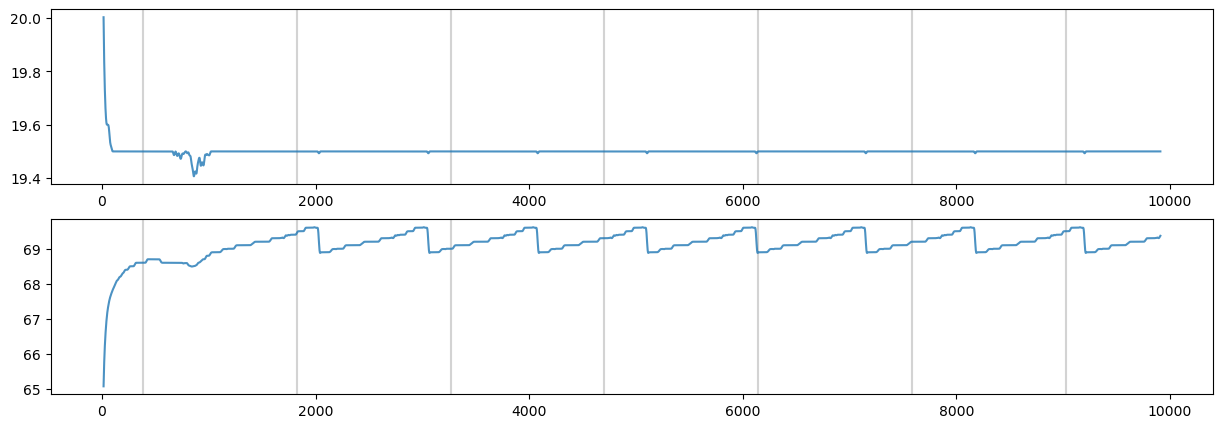

In [14]:
def makeplot_data_simple(df):
    fig, ax = plt.subplots(2,figsize=(15,5))

    dates = df.date.unique()
    inds = [df[df['date'] == i].index[0] for i in dates]


    df.temp.rolling(window=30,center=True,win_type='hanning').mean().plot(ax=ax[0],alpha=0.8)

    df.hum.rolling(window=30,center=True,win_type='hanning').mean().plot(ax=ax[1],alpha=0.8
                                         )

    for ind in inds[1:]: 
        ax[0].axvline(ind, alpha=0.5, color='darkgrey', zorder=0)
        ax[1].axvline(ind, alpha=0.5, color='darkgrey', zorder=0)

#    ax[0].set_ylim(16.3,16.9)


    plt.show();
    
makeplot_data_simple(data)

In [15]:
def makeplot_temphum(df_in ,cutoffindexlow):
    
    data = df_in.iloc[cutoffindexlow:]
    ## set grid lines to background    
    plt.rcParams['axes.axisbelow'] = True
    
    ## define arrays for ticks 
#    mins  = [np.arange(0,16000,1440),np.arange(0,13,1)]

    dates = data['date'].unique()
    inds  = [data[data['date']==dates[i]].index[0] for i in range(0,len(dates))]
    inds.append(data['date'].shape[0])
    
    ## _________________________________________________________________
    ##
    fig, ax1 = plt.subplots(1,1,figsize=(15,5))

    font=15
    smooth=30 
    
    ax1.plot(np.array(data['hum'].rolling(window=smooth).mean()),color='darkblue')

    ax1.set_ylabel('Humidity in %',fontsize=font+3, color='darkblue')
    ax1.set_xlabel('Time in min [from {} {} LT]'.format(data['date'][cutoffindexlow],data['time'][cutoffindexlow]), fontsize=font+3)
    ax1.tick_params(axis='y', colors='darkblue',labelsize=font)
    ax1.tick_params(axis='x', labelsize=font)
    ax1.set_title(f'ROMY: Temperature and Humidity at the Base ({smooth} min mean)',fontsize=font+6, pad=15)
    ax1.set_xticks(inds)
    ax1.set_xticklabels(inds)

    ax2=ax1.twinx()

    ax1.set_zorder(1)  
    ax1.patch.set_visible(False)  

    ax2.plot(np.array(data['temp'].rolling(window=smooth).mean()),color='darkred')
    ax2.tick_params(axis='y', colors='darkred',labelsize=font)

    ax2.set_ylabel('Temperature in °C', color='darkred',fontsize=font+3, labelpad=10)
    ax2.grid(True)
    
#    ax2.set_ylim(16,17)

    ## match left and right grid lines 
    from matplotlib import ticker as tick
    nticks = 9
    ax1.yaxis.set_major_locator(tick.LinearLocator(nticks))
    ax2.yaxis.set_major_locator(tick.LinearLocator(nticks))
    
    ## add patches to indicate days
    for j in range(0,len(inds)):
        if (j+1) % 2:
            continue
        beg , end = inds[j], inds[j+1]
        ax2.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)

    ## add explanation to the text
    plt.figtext(0.1,-0.1,f'*alternating, grey shaded areas indicate days.',size=14)

    plt.figtext(0.1,-0.15,f'**rolling mean values of {smooth} min are shown.',size=14)
                
    plt.show();
    
    ## saving the plot 
    #__save_to([fig], opath , f'romy_{data.date[0]}_temp_hum_all', mode='pdf')


#makeplot_temphum(data,0)
#makeplot_temphum(data,35)


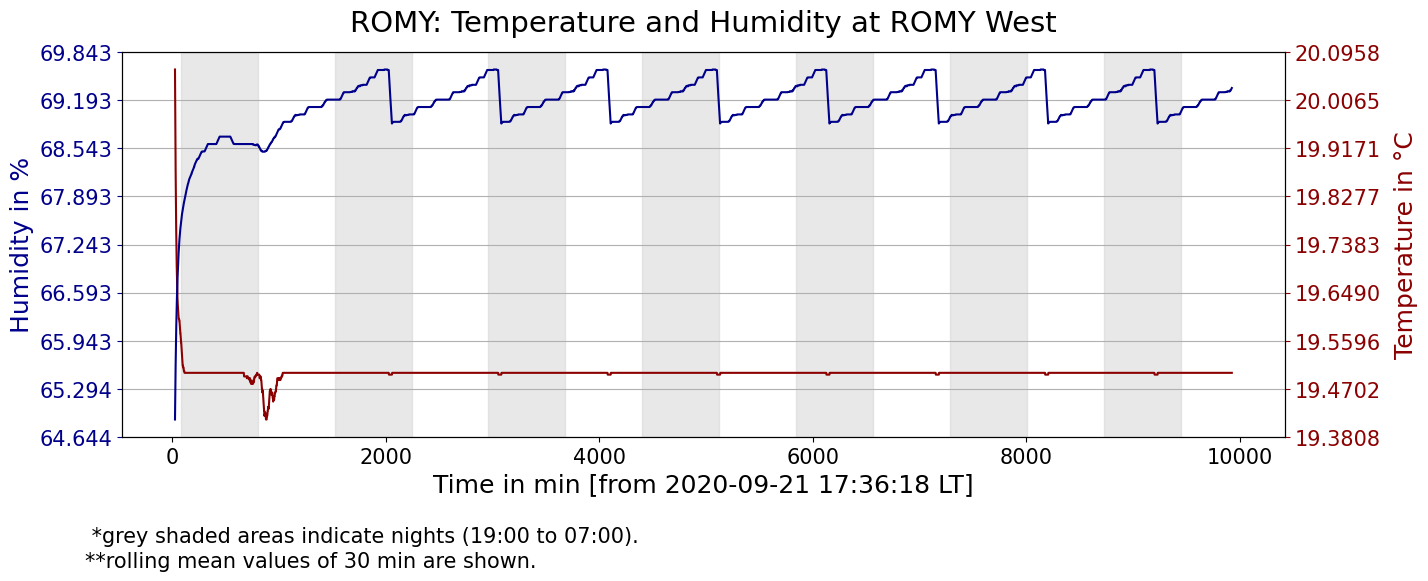


 saving pdf to /home/brotzer/notebooks/figs/romy_2020-09-21_temp_hum_all_daynight... 



In [16]:
def makeplot_daynight(data):

    ## set grid lines to background    
    plt.rcParams['axes.axisbelow'] = True

    ## define arrays for ticks 
    #    mins  = [np.arange(0,16000,1440),np.arange(0,13,1)]

    dates = data['date'].unique()
    
    tbeg, tend = '07:00', '19:00'
    inds1, inds2 = get_night_periods(data, tbeg, tend)
    
    ## _________________________________________________________________
    ##
    fig, ax1 = plt.subplots(1,1,figsize=(15,5))

    font = 15
    
    smooth = 30 # in minutes

    ax1.plot(np.array(data['hum'].rolling(window=smooth).mean()),color='darkblue')

    ax1.set_ylabel('Humidity in %',fontsize=font+3, color='darkblue')
    ax1.set_xlabel('Time in min [from {} {} LT]'.format(data['date'][0],data['time'][0]), fontsize=font+3)
    ax1.tick_params(axis='y', colors='darkblue',labelsize=font)
    ax1.tick_params(axis='x', labelsize=font)
    ax1.set_title(f'ROMY: Temperature and Humidity at {name}',fontsize=font+6, pad=15)
    #    ax1.set_xticks(inds2)
    #    ax1.set_xticklabels(inds2)

    ax2=ax1.twinx()

    ax1.set_zorder(1)  
    ax1.patch.set_visible(False)  

    ax2.plot(np.array(data['temp'].rolling(window=smooth).mean()),color='darkred')
    ax2.tick_params(axis='y', colors='darkred',labelsize=font)

    ax2.set_ylabel('Temperature in °C', color='darkred',fontsize=font+3, labelpad=10)
    ax2.grid(True)

#     ax2.set_ylim(16,17)

    ## match left and right grid lines 
    from matplotlib import ticker as tick
    nticks = 9
    ax1.yaxis.set_major_locator(tick.LinearLocator(nticks))
    ax2.yaxis.set_major_locator(tick.LinearLocator(nticks))

    ## add patches to indicate day and night
    for j in range(0,min(len(inds1),len(inds2))):
        beg , end = inds2[j], inds1[j]
        ax2.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)

    ## add explanation to the text
    plt.figtext(0.1,-0.1,f' *grey shaded areas indicate nights ({tend} to {tbeg}).',size=15)
    plt.figtext(0.1,-0.15,f'**rolling mean values of {smooth} min are shown.',size=15)
        
    plt.show();

    ## saving the plot 
    __save_to([fig], opath , f'romy_{data.date[0]}_temp_hum_all_daynight', mode='pdf')

    
makeplot_daynight(data)



 saving pdf to /home/brotzer/notebooks/figs/romy_2020-09-21_temp_humid_compare_FUR1... 



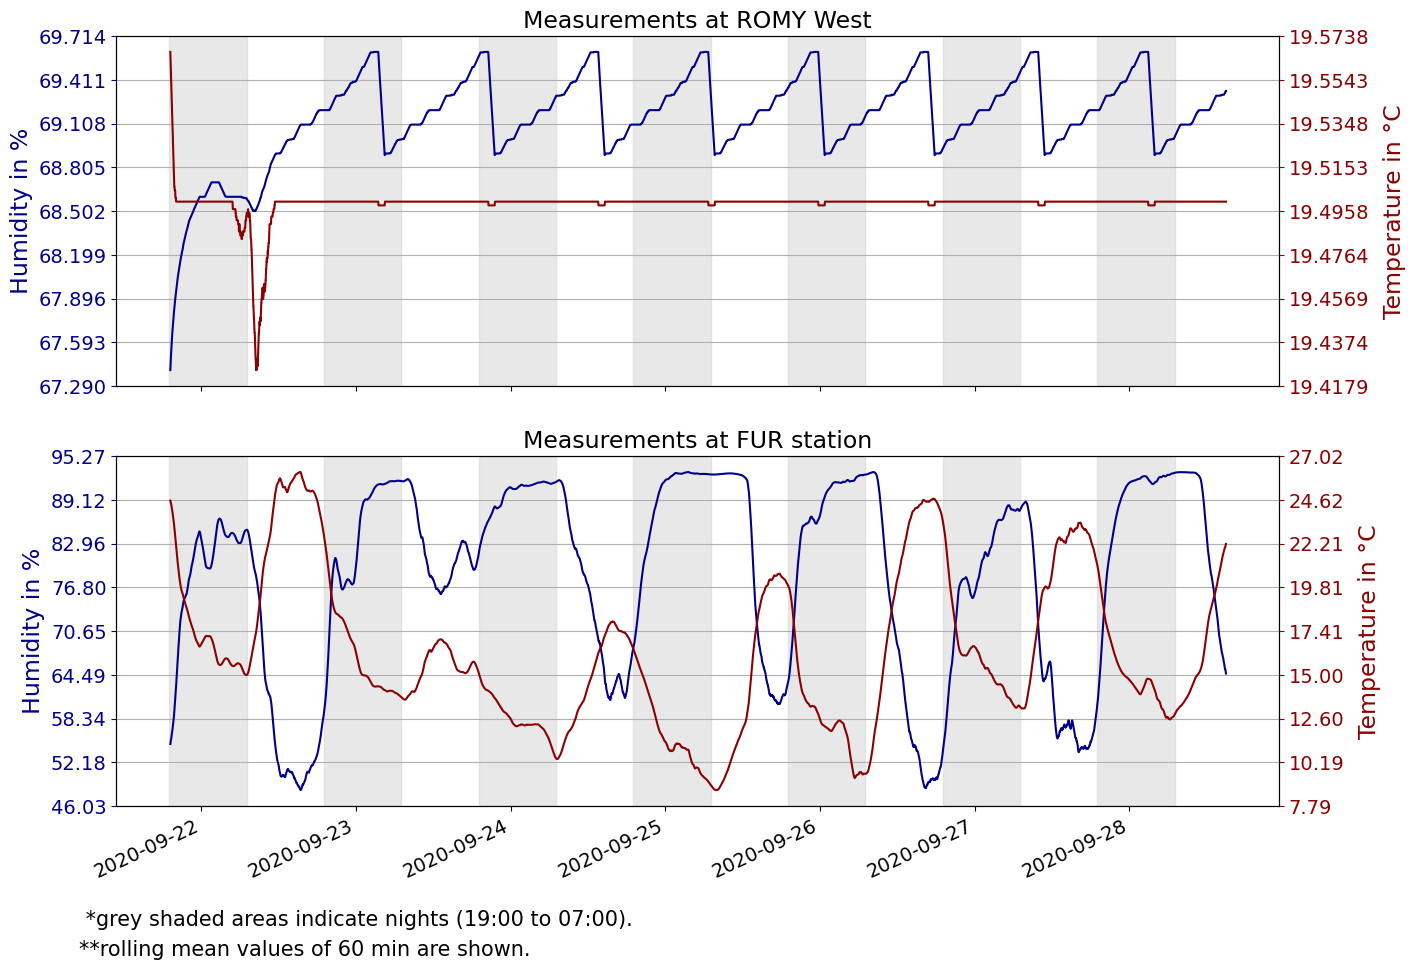

In [17]:
def makeplot_other1(d1, d2):

    plt.style.use('default')
    
    tbeg, tend = '07:00', '19:00' # local time

    ## calculate difference of reference to first sample in minutes 
    
    cutoff = 35
    
    font = 14 
    
    wl = 60
    
    ticks = [d1.date.unique(), [d1[d1.date == i].index[0] for i in d1.date.unique()]]
    
    ## _________________________________________________________________
    ##
    fig, (ax1,ax3) = plt.subplots(2,1,figsize=(15,10),sharex=True)

    
    ## ________________________

    ax1.plot(d1['hum'][cutoff:].rolling(window=wl).mean(),color='darkblue',zorder=3)

    
    ax1.set_ylabel('Humidity in %',fontsize=font+3, color='darkblue')
    ax1.tick_params(axis='y', colors='darkblue',labelsize=font)
    ax1.set_title(f'Measurements at {name}',size=font+3)
    ax1.set_zorder(3)
    ax1.yaxis.grid(True,zorder=0)


    ## ________________________

    ax2=ax1.twinx()
    
    ax2.set_zorder(3)  
    ax2.patch.set_visible(False)
    
    ax2.plot(d1['temp'][cutoff:].rolling(window=wl).mean(),color='darkred',zorder=3)
    ax2.grid(False)
    ax2.tick_params(axis='y', colors='darkred',labelsize=font)

    ax2.set_ylabel('Temperature in °C', color='darkred',fontsize=font+3, labelpad=10)
#    ax2.set_ylim(16,18)

    ## ________________________

    nticks = 9
    ax1.yaxis.set_major_locator(tick.LinearLocator(nticks))
    ax2.yaxis.set_major_locator(tick.LinearLocator(nticks))

    
    
    ## __________________________________________________________________
    ##
#     ax3.plot(d2['idx'][offset:]-offset,d2['hum'][offset:].rolling(window=10).mean(),color='darkblue')
    ax3.plot(d2['hum'][cutoff:].rolling(window=wl).mean(),color='darkblue',zorder=3)

    
    ax3.set_ylabel('Humidity in %',fontsize=font+3, color='darkblue')
#     ax3.set_xlabel(f'Time in min [from {d1.date[0]} {d1.time[0]} LT]',fontsize=font+3, labelpad=10)
    ax3.tick_params(axis='y', colors='darkblue',labelsize=font)
    ax3.set_title(f'Measurements at FUR station', size=font+3)
    ax3.yaxis.grid(True,zorder=0)
    ax3.set_xticks(ticks[1][1:])
    ax3.set_xticklabels(ticks[0][1:], ha='right',fontsize=font, rotation=25)    
    
    ## ________________________

    ax4=ax3.twinx()

    ax4.set_zorder(3)  
    ax4.patch.set_visible(False)


#     ax4.plot(d2['idx'][offset:]-offset,d2['temp'][offset:].rolling(window=10).mean(),color='darkred')
    ax4.plot(d2['temp'][cutoff:].rolling(window=wl).mean(),color='darkred',zorder=3)
    ax4.grid(False)
    ax4.tick_params(axis='y', colors='darkred',labelsize=font)

    ax4.set_ylabel('Temperature in °C', color='darkred',fontsize=font+3, labelpad=10)
#    ax4.set_ylim(14,16)

    ## ________________________

    nticks = 9
    ax3.yaxis.set_major_locator(tick.LinearLocator(nticks))
    ax4.yaxis.set_major_locator(tick.LinearLocator(nticks))


    ## add patches to indicate day and night
    inds1, inds2 = get_night_periods(data, tbeg, tend)
    
    for j in range(0,len(inds1)):
        beg , end = inds2[j], inds1[j]
        ax1.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)
        ax3.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)

    ## add explanation to the text
    plt.figtext(0.1,-0.01,f' *grey shaded areas indicate nights ({tend} to {tbeg}).',size=15)
    plt.figtext(0.1,-0.04,f'**rolling mean values of {wl} min are shown.',size=15)
        
    
    ## export plot 
    __save_to([fig], opath, f'romy_{data.date[0]}_temp_humid_compare_FUR1', 'pdf')

    
    plt.show();
    
    
makeplot_other1(data,furt)


 saving pdf to /home/brotzer/notebooks/figs/romy_2020-09-21_temp_humid_compare_FUR2... 



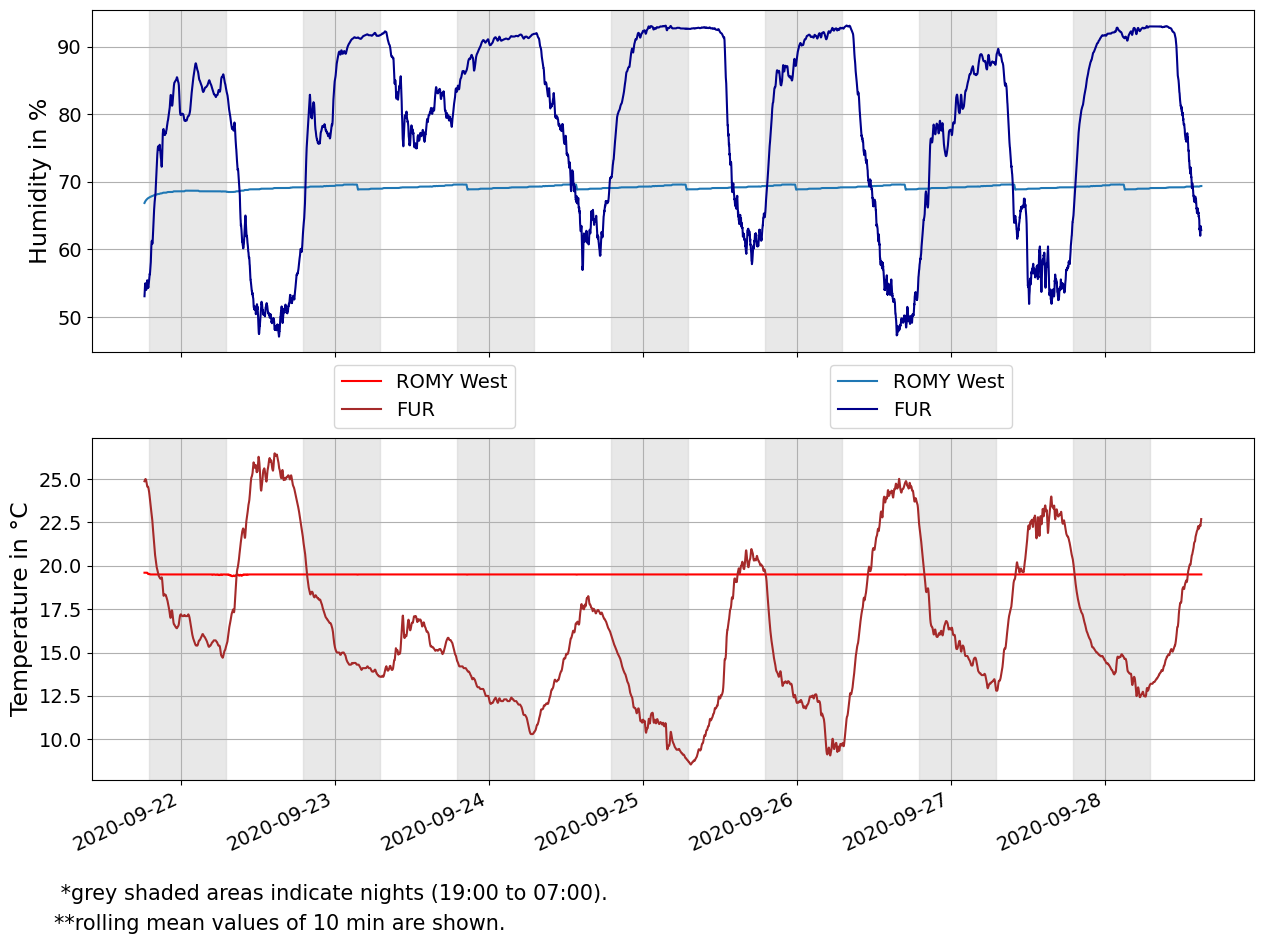

In [18]:
def makeplot_other2(d1, d2):

    plt.style.use('default')
    
    tbeg, tend = '07:00', '19:00' # local time

    cutoff = 35
    
    font = 14
    
    wl = 10
    
    ticks = [d1.date.unique(), [d1[d1.date == i].index[0] for i in d1.date.unique()]]

    
    ## _________________________________________________________________
    ##
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10),sharex=True)
    
    fig.subplots_adjust(hspace=0.25)

    ## ________________________

    ax1.plot(d1['hum'][cutoff:].rolling(window=wl).mean(),color='C0',label=name)
    ax1.plot(d2['hum'][cutoff:].rolling(window=wl).mean(), color='darkblue', label='FUR')
    
    ax1.set_ylabel('Humidity in %',fontsize=font+3)
    ax1.tick_params(axis='y',labelsize=font)

    ax1.grid('On')
    ax1.legend(loc='lower right', bbox_to_anchor=(0.8, -0.25),fontsize=font)

    
    ## ________________________
    
    ax2.plot(d1['temp'][cutoff:].rolling(window=wl).mean(),color='red',label=name)
    ax2.plot(d2['temp'][cutoff:].rolling(window=wl).mean(), color='brown', label='FUR')
    
    ax2.set_ylabel('Temperature in °C',fontsize=font+3)
#     ax2.set_xlabel(f'Time in min [from {d1.date[0]} {d1.time[0]} LT]',fontsize=font+3, labelpad=10)
    ax2.tick_params(axis='y',labelsize=font)
    
    ax2.set_xticks(ticks[1][1:])
    ax2.set_xticklabels(ticks[0][1:], ha='right',fontsize=font, rotation=25)    

    ax2.grid('On')
    ax2.legend(loc='lower left', bbox_to_anchor=(0.2, 1.00),fontsize=font)
    
    ## add patches to indicate day and night

    inds1, inds2 = get_night_periods(d1, tbeg, tend)
    
    for j,ind in enumerate(inds1):
        beg , end = inds1[j], inds2[j]
        ax1.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)
        ax2.axvspan(beg, end, color='lightgrey', alpha=0.5, zorder=0)

    ## add explanation to the text
    plt.figtext(0.1,-0.01,f' *grey shaded areas indicate nights ({tend} to {tbeg}).',size=15)
    plt.figtext(0.1,-0.04,f'**rolling mean values of {wl} min are shown.',size=15)
        
    
    ## export plot     
    __save_to([fig], opath, f'romy_{data.date[0]}_temp_humid_compare_FUR2', 'pdf')

    plt.show();
    
    
makeplot_other2(data,furt)

In [19]:
def makeplot_daily(data):
    
    plt.style.use('default')
    
    dates = data['date'].unique()
    mins  = [np.arange(0,1560,120),np.arange(0,25,2)]

    ## _________________________________________________________________
    ##
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
    
    font=16
    
    for i,date in enumerate(dates):
        if i == 0:
            ax1.plot(np.arange(1441-len(np.array(data[data['date']==date]['temp'])),1441,1),np.array(data[data['date']==date]['temp'].rolling(window=10).mean()),label=str(date))
            ax2.plot(np.arange(1441-len(np.array(data[data['date']==date]['temp'])),1441,1),np.array(data[data['date']==date]['hum'].rolling(window=10).mean()),label=str(date))

        else:
            ax1.plot(np.array(data[data['date']==date]['temp'].rolling(window=10).mean()),label=str(date))
            ax2.plot(np.array(data[data['date']==date]['hum'].rolling(window=10).mean()),label=str(date))

        
    ax1.set_xticks(mins[0])
    ax1.set_xticklabels(mins[1])
    ax1.set_ylabel('Temperature in °C',fontsize=font+3, labelpad=5)
#    ax1.set_xlabel('Time in hours',fontsize=font+3, labelpad=5)
    ax1.tick_params(axis='both',labelsize=font)
    ax1.grid('On')
    
    ax2.set_xticks(mins[0])
    ax2.set_xticklabels(mins[1])
    ax2.set_ylabel('Humidity in %',fontsize=font+3, labelpad=5)
    ax2.set_xlabel('Time in hours',fontsize=font+3, labelpad=5)
    ax2.tick_params(axis='both',labelsize=font)
    ax2.grid('On')
    
    ax2.legend(bbox_to_anchor=(1.0, -0.3),fontsize=font, ncol=5)
    
    plt.show();
    
    __save_to([fig], opath, 'romy_temperature_humidity_overlap', 'pdf')
    
# makeplot_daily(data)

IndexError: index 2 is out of bounds for axis 0 with size 2

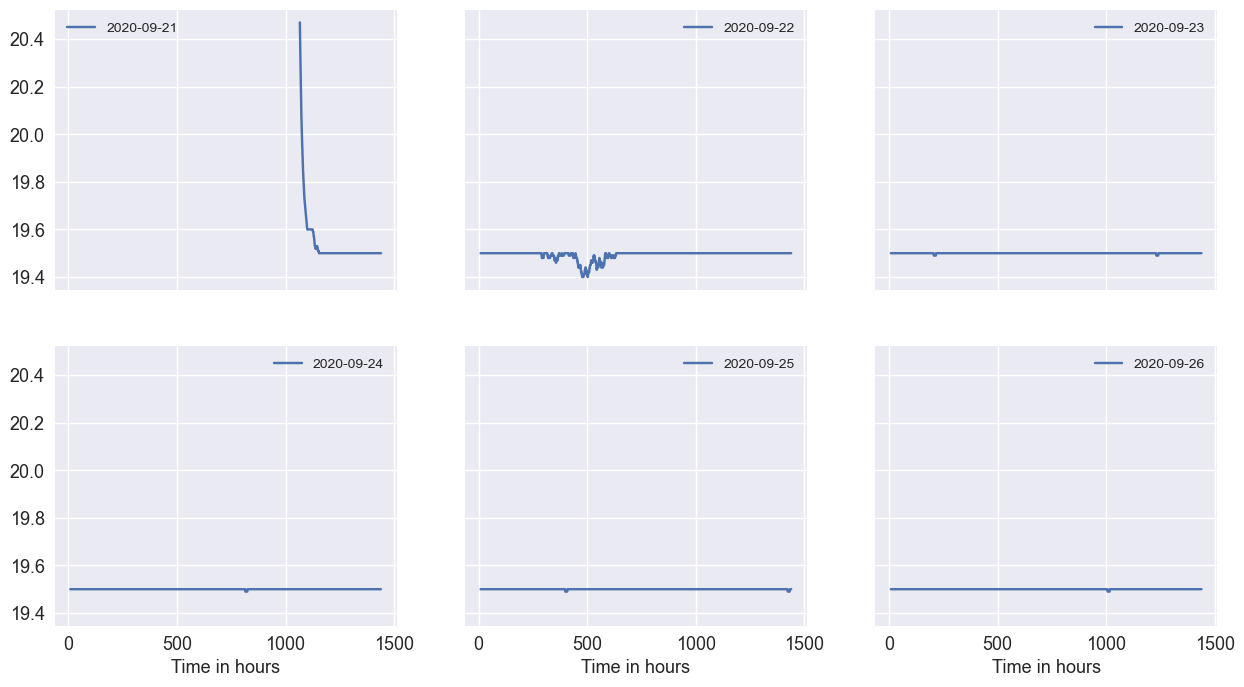

In [20]:
def makeplot_byday(data,col):
        
    plt.style.use('seaborn')
        
    dates = data['date'].unique()
    mins  = [np.arange(0,1560,120),np.arange(0,25,2)]
    
    ## _________________________________________________________________
    ##
    fig, axes = plt.subplots(int(len(dates)/3),3,figsize=(15,8),sharex=True,sharey=True)
    
    font=13

    ## fill subplots iteratively 
    j=-1
    for i,date in enumerate(dates):
        if i % 3 == 0:
            j+=1
            
        if i == 0:
            axes[j,i-j*3].plot(np.arange(1441-len(np.array(data[data['date']==date][col])),1441,1),np.array(data[data['date']==date][col].rolling(window=10).mean()),label=str(date))            
        else:
            axes[j,i-j*3].plot(np.array(data[data['date']==date][col].rolling(window=10).mean()),label=str(date))

        axes[j,i-j*3].tick_params(axis='both',labelsize=font)
        axes[j,i-j*3].legend()
        axes[int(len(dates)/3)-1,i-j*3].set_xlabel('Time in hours',size=font)
         

    ## reset ticks
    axes[0,0].set_xticks(mins[0])
    axes[0,0].set_xticklabels(mins[1])
    
    ## separate treatment for temperature and humidity data
    if col == 'temp':
        axes[0,1].set_title('Temperature in °C',size=font+4,pad=15)
        axes[0,0].set_ylim(16,18)
        __save_to([fig], opath, 'romy_temperature_alldays','pdf')
    
    elif col == 'hum':
        axes[0,1].set_title('Humidity in %', size=font+4,pad=15)
        __save_to([fig], opath, 'romy_humidity_alldays','pdf')
    
        
makeplot_byday(data,'temp')

makeplot_byday(data,'hum')

In [21]:
def stats(data):
    dates = data['date'].unique()

    Tmeans, Tmeds, Hmeans, Hmeds = [],[],[],[]
    for day in dates: 
        Tmeans.append(round(data[data['date']==day]['temp'].mean(),1))
        Tmeds.append(data[data['date']==day]['temp'].median())
        Hmeans.append(round(data[data['date']==day]['hum'].mean(),1))
        Hmeds.append(data[data['date']==day]['hum'].median())


    df2 = pd.DataFrame({'day':dates, 'Tmean':Tmeans, 'Tmed':Tmeds, 'Hmean':Hmeans, 'Hmed':Hmeds})
    return df2
    
stats(data)

,day,Tmean,Tmed,Hmean,Hmed
0,2020-09-21,19.6,19.5,67.9,68.3
1,2020-09-22,19.5,19.5,68.9,68.9
2,2020-09-23,19.5,19.5,69.2,69.2
3,2020-09-24,19.5,19.5,69.2,69.2
4,2020-09-25,19.5,19.5,69.3,69.3
5,2020-09-26,19.5,19.5,69.2,69.1
6,2020-09-27,19.5,19.5,69.3,69.3
7,2020-09-28,19.5,19.5,69.2,69.2



 saving pdf to /home/brotzer/notebooks/figs/romy_2020-09-21_temp_humid_spectrum_data... 



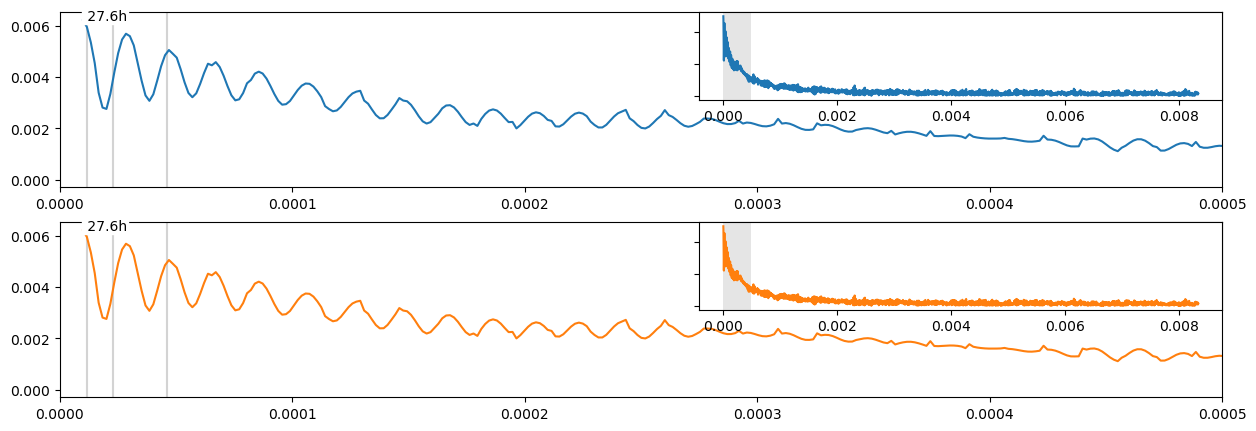


 saving pdf to /home/brotzer/notebooks/figs/romy_2020-09-21_temp_humid_spectrum_furt... 



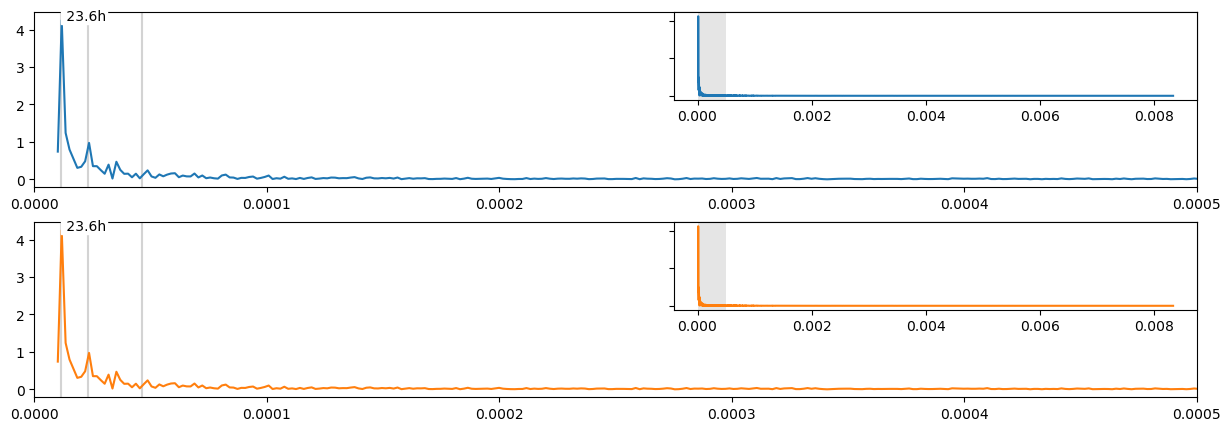

In [28]:
def makeplot_spectrum(data_in,name):
    from obspy.signal.freqattributes import spectrum
    from obspy.signal.util import _npts2nfft
    from scipy.signal import hann
    
    Tfft, Tff = __fft(np.array(data_in.temp), 60, window=False, normalize=None)
    Hfft, Hff = __fft(np.array(data_in.temp), 60, window=False, normalize=None)

    
#    d1 = np.array(data_in.temp[:1000]); l1 = len(d1)
#    Tfft2, Tff2 = spectrum(d1,hann(l1),_npts2nfft(l1))
#     Hfft2, Hff2 = __fft(np.array(data_in.temp), 60, window=True, normalize=None)
    
    plt.style.use('default')
    
    ## _________________________________________________________________
    ##
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,5))

    font = 15
    cut = 5
    
    ax1.plot(Tff[cut:], Tfft[cut:], color='C0')
    ax2.plot(Hff[cut:], Hfft[cut:], color='C1')

    for period in [86400,(86400/2),(86400/4)]: 
        ax1.axvline(1/period, alpha=0.5, color='darkgrey', zorder=0)
        ax2.axvline(1/period, alpha=0.5, color='darkgrey', zorder=0)
        
    flow, fhigh = 0, 0.0005
    ax1.set_xlim(flow,fhigh)
    ax2.set_xlim(flow,fhigh)

    idx, xmax, ymax = __find_max(Tff[cut:],Tfft[cut:])
    ax1.annotate(f'{1/xmax/3600:{5}.{3}}h', (xmax,ymax), bbox=dict(fc="white", pad=0.5, ec="white"))

    idx, xmax, ymax = __find_max(Hff[cut:],Hfft[cut:])
    ax2.annotate(f'{1/xmax/3600:{5}.{3}}h', (xmax,ymax), bbox=dict(fc="white", pad=0.5, ec="white"))
    
    
    ## _________________________________________________________________
    ## zoom in 
    axins1 = ax1.inset_axes([0.55, 0.5, 0.45, 0.5])
    axins1.plot(Tff[cut:], Tfft[cut:])
    
    axins1.axvspan(flow,fhigh, alpha=0.2, facecolor='grey')

#     mark_inset(ax1, axins1, loc1=3, loc2=4, ec='0.3',zorder=2)
#     x1, x2 = 0, 0.0008
#     axins1.set_xlim(x1, x2)
#     axins1.set_ylim(min(Tfft), max(Tfft))
# #    axins1.set_xticklabels('')
    axins1.set_yticklabels('')
    
    ## _________________________________________________________________
    ## zoom in 
    axins2 = ax2.inset_axes([0.55, 0.5, 0.45, 0.5])
    axins2.plot(Hff[cut:], Hfft[cut:],color='C1')
    
    axins2.axvspan(flow,fhigh, alpha=0.2, facecolor='grey')
#     mark_inset(ax2, axins2, loc1=3, loc2=4, ec='0.3',zorder=2)
#     x1, x2 = 0, 0.0008
#     axins2.set_xlim(x1, x2)
#     axins2.set_ylim(min(Hfft), max(Hfft))
# #    axins2.set_xticklabels('')
    axins2.set_yticklabels('')
    
    ## export plot     
    __save_to([fig], opath, f'romy_{data.date[0]}_temp_humid_spectrum_{name}', 'pdf')

    plt.show();
    
    
makeplot_spectrum(data,'data')
makeplot_spectrum(furt,'furt')

In [ ]:
# data[['temp','hum']].rolling(30).mean().plot(subplots=True, figsize=(15,5),color="C0")

In [ ]:
#furt[['temp','hum']].rolling(30).mean().plot(subplots=True, figsize=(15,5),color="C0")